## WEEK 7 ASSIGNMENT

### In this assignment, you will explore data collected on earthquakes of magnitude > 4.5 that occurred globally from 1 Sept 2024 through 1 Sept 2025 using some basic tools in Pandas!
 
### HELPFUL REMINDER FOR THIS ASSIGNMENT
- remember: dataframe['col name'] accesses a column

In [6]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread
import seaborn as sb
import numpy as np

####  Read in data into a Pandas DataFrame called 'earth' - you can copy & paste from last week
- allow dataframe index to default to creating its own - the time strings are messy and you haven't learned yet how to deal with them!
<br><br>
- we are only interested in the following variables (columns), so either only read in these variables, or read in all variables and subsequently drop the other columns
   - time
   - latitude
   - longitude
   - depth
   - mag (magnitude of earthquake - strength)
   - place

In [7]:
earth = pd.read_csv('query_0924_0925.csv', 
                    usecols=['time','latitude','longitude','depth','mag','place']) 

#### (1)  For the strongest earthquake in this specific dataset:
#### (a.)  What was the magnitude of the strongest earthquake?
#### (b.)  What month and day did the strongest earthquake occur?
#### (c.) In  what country did the strongest earthquake occur?
- You do NOT have to parse the date string, or the place string... for now, you'll just work with the full strings 
- FYI, how to (manually) read date string: year-month-dayTtime
#### (d.) (Optional, ungraded) What natural hazard(s) was associated with this earthquake?
#### (e)  (No action item unless you want to learn more) Cool visualizations on this strongest earthquake (and a sanity check ;-): https://earthquake.usgs.gov/earthquakes/eventpage/us6000qw60/executive 

In [ ]:
# Select index with strongest quake
max_quake = earth.iloc[earth['mag'].idxmax()]

# a.) 
print('Magnitude:', max_quake['mag'])
# 8.8

# b.)
print('Month:', pd.to_datetime(max_quake['time']).month) # Turn time into timestamp and grab month
# July

# c.)
print(max_quake['place'])
# Russia

# d.) Tsunami

Magnitude: 8.8
Month: 7
2025 Kamchatka Peninsula, Russia Earthquake


#### (2) How many earthquakes occur with magnitude greater than 6?

In [ ]:
print(len(earth[earth['mag'] > 6]),'Earthquakes')
# Sanity check: 100 eathquakes 

100 Earthquakes


#### (Optinal, ungraded challenge)  How many of these magnitude > 6 earthquakes were within 100 km of the location of the strongest earthquake that you identified in (1)?  I.e., could be consider 'aftershocks'?  [The exact distance threshold used is a dependent on the length of the fault that ruptured, among other factors; 100 km is just a super rough estimate]. 

In [ ]:
from geopy.distance import geodesic # Import geodesic to calculate geodesic distance

gt6 = earth[earth['mag'] > 6] # quakes >6 mag

# Create coordinate pair for strongest quake
strongest_coords = (max_quake['latitude'], max_quake['longitude'])

# Function to return geodesic distance for coordinates in each row
def distance_km(row):
    quake_coords = (row['latitude'], row['longitude']) # coordinate pair for each quake
    distance = geodesic(strongest_coords, quake_coords).km # get geodesic dsitance in km
    return distance

# Use .apply to pass the function to each row (axis=1) in the dataframe
# Add each distance to new column
gt6['distance_km'] = gt6.apply(distance_km, axis=1)

# Get quakes with distance within 100km
nearby_quakes = gt6[gt6['distance_km'] <= 100]

print('Number of >6 magnitude quakes within 100km of strongest quake:', len(nearby_quakes))
nearby_quakes



Number of >6 magnitude quakes within 100km of strongest quake: 9


/var/folders/wr/1grjyq1x4l38ld6sm3f2fw7m0000gp/T/ipykernel_91308/1669984281.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt6['distance_km'] = gt6.apply(distance_km, axis=1)


,time,latitude,longitude,depth,mag,place,distance_km
1496,2025-07-30T00:16:06.520Z,52.1048,159.6920,35.000,6.2,"126 km SE of Vilyuchinsk, Russia",58.610278
1499,2025-07-30T00:09:58.961Z,52.1946,159.8008,36.622,6.9,"125 km SE of Petropavlovsk-Kamchatsky, Russia",46.204452
1532,2025-07-29T23:30:44.566Z,52.6498,159.5787,25.423,6.1,"78 km SE of Petropavlovsk-Kamchatsky, Russia",49.416945
1533,2025-07-29T23:30:03.032Z,52.5195,159.7031,16.375,6.3,"94 km SE of Petropavlovsk-Kamchatsky, Russia",38.137937
1534,2025-07-29T23:24:52.480Z,52.4980,160.2637,35.000,8.8,"2025 Kamchatka Peninsula, Russia Earthquake",0.000000
1848,2025-07-20T07:23:02.065Z,52.8915,160.7461,34.991,6.5,"143 km E of Petropavlovsk-Kamchatsky, Russia",54.600104
1853,2025-07-20T07:07:42.573Z,52.6981,160.8332,10.000,6.6,"153 km ESE of Petropavlovsk-Kamchatsky, Russia",44.552109
1861,2025-07-20T06:49:04.327Z,52.8301,160.6816,34.000,7.4,"2025 Eastern Kamchatka, Russia Earthquake",46.531175
1866,2025-07-20T06:28:17.860Z,52.9286,160.6233,23.000,6.6,"134 km E of Petropavlovsk-Kamchatsky, Russia",53.727715


#### (3) What is the average depth of earthquakes with magnitude greater than 6?

In [29]:
print('Mean Depth:',earth[earth['mag'] > 6]['depth'].mean(),'km')


# Sanity check: 45 km

Mean Depth: 45.12304 km


#### (4) What percent of all earthquakes with magnitude greater than 6 occur at a depth of less than 10 km?
- you can break this down into discrete steps over multiple lines of code if you'd like
- but NO HARDCODING regardless of how you do this!

In [37]:
d6 = earth[earth['mag'] > 6]['depth'] # Get depths

p=len(d6[d6<10]) / len(d6) *100 # Get percentage
print('% of Quakes w/ Depth <10km:', p,'%')

# Sanity check: 9% 

% of Quakes w/ Depth <10km: 9.0 %


#### (5) Create a map that has a marker for the (longitude, latitude) location of each earthquake in this dataset in a color of your choice.
- One way to do this:  create your map axes (your geoaxes)
  - Look at how we did this in our 2D plotting, Part II lesson 
- Then create scatter plot using the map axes
<br><br>

*Notes*
- Please include coastlines, gridlines
- Choose a projection that is not PlateCarree - one that seems would work well with plotting earthquake locations (not a trick question - take a look at https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html for your preferred choice)
  - Remember projection is what you're plotting data on, transform is coordinates your data is in: https://scitools.org.uk/cartopy/docs/v0.16/tutorials/understanding_transform.html - recent lesson 
  - Your transform should be ccrs.PlateCarree() still - this will go in your call to the scatterplot via the transform option
<br><br>
- **CHALLENGED, UNGRADED**:  color-code markers by magnitude and/or size in a way that really offsets the more significant earthquakes from the many, many weaker earthquakes (we'll colorcode by two groups of magnitudes in the next question, but I'm asking for a range of color over all magnitudes, if that makes sense)

Text(0.5, 1.0, 'Worldwide Earthquakes From 2024-09-01 to 2025-08-31')

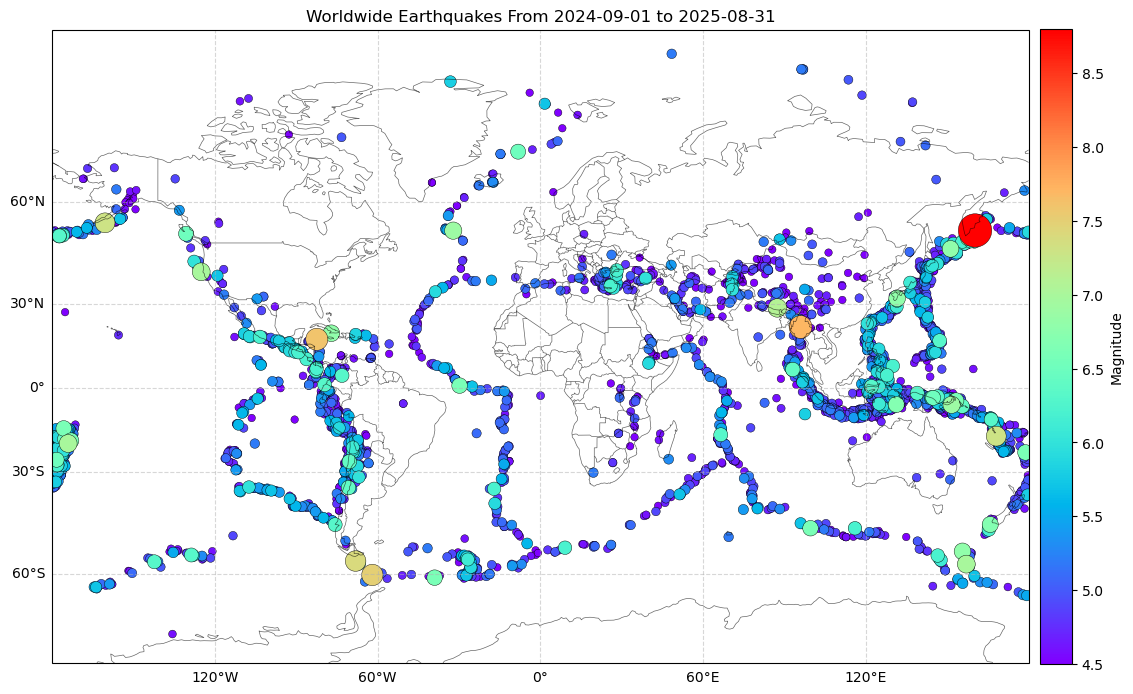

In [120]:

proj=ccrs.Miller() # Map projection

# Initialize plot
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection=proj))

# Sort by magnitude, this will plot larger quakes over smaller ones
e = earth.sort_values(by='mag')

lons = e['longitude'].values
lats = e['latitude'].values
mags = e['mag'].values

# Expontentially scale sizes of scatter points
# Helps create more noticable size difference between mags
sizes = 1.3 * (2 ** mags)

cmap=plt.get_cmap('rainbow')

# Plot scatter points
cs = ax.scatter(lons, lats, c=mags, s=sizes, cmap=cmap,
                edgecolors='black',
                linewidths=0.3, 
                transform=ccrs.PlateCarree())

# Colorbar
cb = fig.colorbar(cs, shrink=0.55, pad=0.01, label='Magnitude')

ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidths=0.5, alpha=0.6)
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidths=0.5, alpha=0.6)

# Add gridlines
gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True)
gl.bottom_labels = True
gl.left_labels = True
gl.top_labels = False
gl.right_labels = False

ax.set_title(f'Worldwide Earthquakes From {pd.to_datetime(earth['time'].min()).strftime('%Y-%m-%d')} to {pd.to_datetime(earth['time'].max()).strftime('%Y-%m-%d')}')

#### (6) Discuss, in a sentence or two, what you notice about any patterns in earthquakes in your map in (5)

In [ ]:
# They cleary show where the tectonic plate boundaries are, as they all seem to cluster around and along said boundaries. 
# There also appears to be more quakes in the Western Pacific than any other region.

#### (7) Make the same map as in (5), but instead, plot earthquakes with magnitude greater than 6 a different color than earthquakes with magnitude less than or equal to 6, and a different size (stronger earthquakes = larger markers)
- experiment with including a legend!
- you'll specify the labels in each call to scatter using the label argument
- and then call the legend (ax.legend) after each call to ax.scatter

Text(0.5, 1.0, 'Worldwide Earthquakes From 2024-09-01 to 2025-08-31')

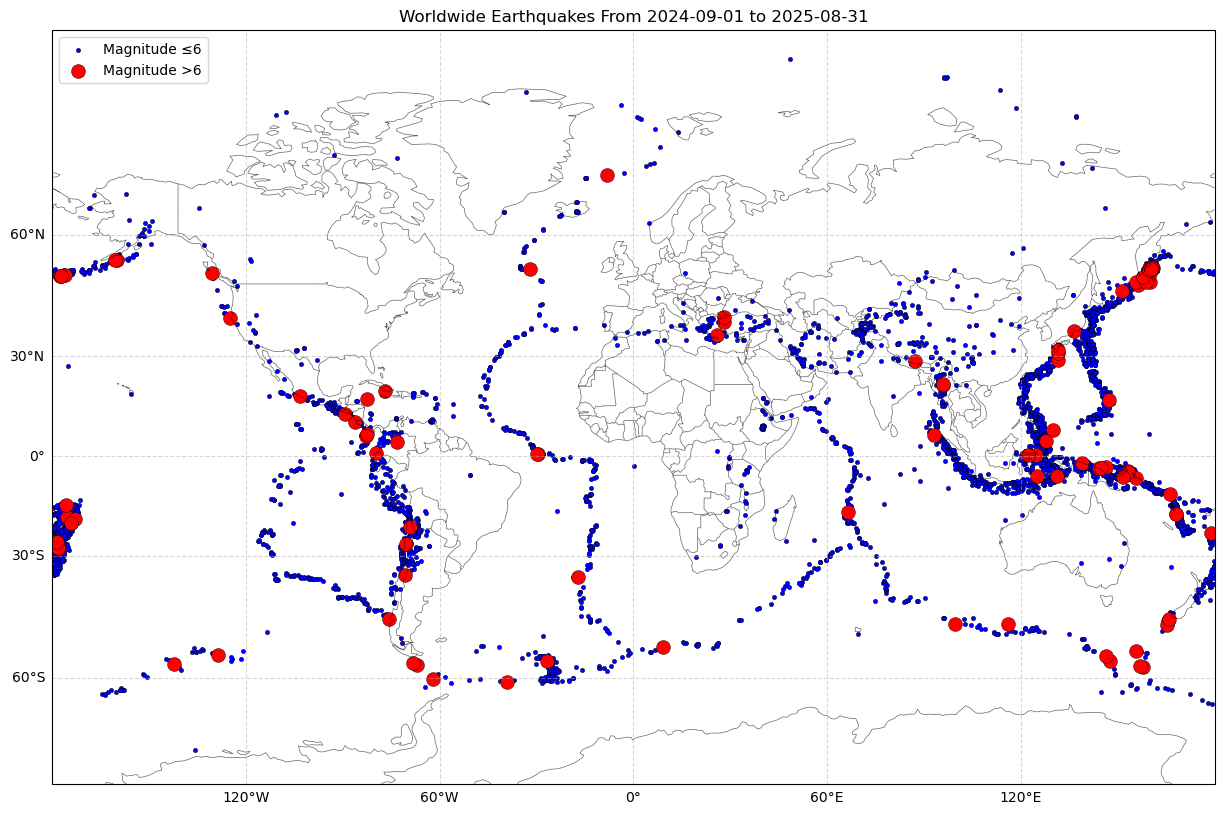

In [ ]:
proj=ccrs.Miller() # Map projection

# Initialize plot
fig, ax = plt.subplots(figsize=(15,15), subplot_kw=dict(projection=proj))

# Sort by magnitude
e = earth.sort_values(by='mag')

over6 = e[e['mag'] > 6] # mags over 6
under6 = e[e['mag'] <= 6] # mags under or equal to 6

# Plot earthquakes with mags <=6
ax.scatter(under6['longitude'], under6['latitude'], c='blue', s=10,
                edgecolors='black',
                linewidths=0.3, 
                transform=ccrs.PlateCarree(),
                label='Magnitude ≤6')

# Plot earthquakes with mags >6
ax.scatter(over6['longitude'], over6['latitude'], c='red', s=100,
                edgecolors='black',
                linewidths=0.3, 
                transform=ccrs.PlateCarree(),
                label='Magnitude >6')



ax.add_feature(cfeature.COASTLINE, edgecolor="black", linewidths=0.5, alpha=0.6)
ax.add_feature(cfeature.BORDERS, edgecolor="black", linewidths=0.5, alpha=0.6)

# Add gridlines
gl = ax.gridlines(alpha=0.5, linestyle='--', draw_labels=True)
gl.bottom_labels = True
gl.left_labels = True
gl.top_labels = False
gl.right_labels = False

ax.legend(loc='upper left') # Call legend

ax.set_title(f'Worldwide Earthquakes From {pd.to_datetime(earth['time'].min()).strftime('%Y-%m-%d')} to {pd.to_datetime(earth['time'].max()).strftime('%Y-%m-%d')}')